# Analysis for Deep Learning, deep change? 

This notebook analyses a dataset of Arxiv papers for our Deep learning paper. 

**Activities**

* Load the data
* Initial exploration
* Produce a couple of charts for the AI Index including:
   * Trends in papers within AI related domains
   * Relative importance of DL, focusing on categories of interest (computer vision and natural language vs learning and stats)
   
* Carry out mapping analysis



## 0. Preamble

In [1]:
%matplotlib inline

#Some imports
import time
#import xml.etree.ElementTree as etree
from lxml import etree

import feedparser

#Imports
#Key imports are loaded from my profile (see standard_imports.py in src folder).

#Paths

#Paths
top = os.path.dirname(os.getcwd())

#External data (to download the GRID database)
ext_data = os.path.join(top,'data/external')

#Interim data (to place seed etc)
int_data = os.path.join(top,'data/interim')

#Figures
fig_path = os.path.join(top,'reports/figures')

#Models
mod_path = os.path.join(top,'models')


#Get date for saving files
today = datetime.datetime.today()

today_str = "_".join([str(x) for x in [today.day,today.month,today.year]])


## 1. Load data

We are going to work with data which have classified DL papers based on different strategies and compare results for robustness. Write a pipeiline that does this automatically


In [29]:
# Initial exploration before writing the pipeline

papers = pd.read_json(ext_data+'/csDL_noCorExCompounds.json',orient='records')

papers.shape

(116722, 6)

There are 116,722 papers. What does this number represent? The total number of CS + Stats papers in Arxiv?

In [30]:
#Let's check the variables
papers.head()

,arxiv_cat,arxiv_id,cex_isDL_1,cex_isDL_1.5,lda_isDL,publication_year
0,cs.NE,704.0047,False,False,False,2007
1,cs.NE,704.0050,False,False,False,2007
2,cs.DS,704.0062,False,False,False,2007
3,cs.CE,704.0090,False,False,False,2007
4,cs.CC,704.0108,False,False,False,2007


In [31]:
#Variables 3 and 4 refer to the classification based on correlation topic modelling vs LDA

#let's tidy variable names

papers.columns = ['category','id','is_dl_cex1','is_dl_cex1_5','is_dl_lda','year']

In [113]:
for x in papers.columns:
    
    print(x)
    print('====')
    
    print(papers[x].value_counts().head(n=10))
    print('\n')

category
====
cs.IT      16947
cs.CV      10407
cs.LG       6990
cs.AI       6327
cs.DS       6148
cs.NI       6114
cs.LO       4488
cs.CL       4227
stat.ML     3929
cs.DC       3902
Name: category, dtype: int64


id
====
1602.03599    1
1507.06944    1
1611.09956    1
1207.13540    1
1702.05053    1
1412.53560    1
1601.07941    1
1511.04599    1
807.05520     1
1412.65500    1
Name: id, dtype: int64


is_dl_cex1
====
False    100511
True      16211
Name: is_dl_cex1, dtype: int64


is_dl_cex1_5
====
False    104759
True      11963
Name: is_dl_cex1_5, dtype: int64


is_dl_lda
====
False    100537
True      16185
Name: is_dl_lda, dtype: int64


year
====
2016    21822
2017    18482
2015    16790
2014    14160
2013    12683
2012    10061
2011     7232
2010     6434
2009     4326
2008     3124
Name: year, dtype: int64




### Plot paper trends

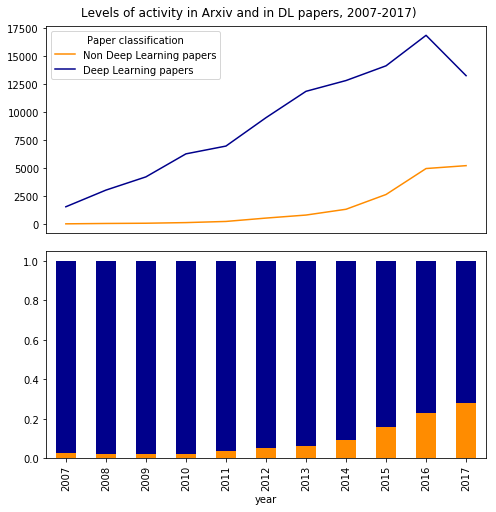

In [112]:
#DL/non_DL papers per year
year_dl = pd.crosstab(papers.year,papers.is_dl_cex1).iloc[:,[1,0]]

#Normalised for stacked barchart
year_dl_norm = pd.crosstab(papers.year,papers.is_dl_cex1,normalize=0).iloc[:,[1,0]]

#Initialise fig and ax
fig,ax = plt.subplots(figsize=(7,7),nrows=2)

#Plot
year_dl.plot(ax=ax[0],color=['darkorange','darkblue'])
year_dl_norm.plot.bar(stacked=True,ax=ax[1],color=['darkorange','darkblue'])

#Set a couple of things off. Not sure why sharex wasn't working above.
ax[0].get_xaxis().set_visible(False)
ax[1].get_legend().set_visible(False)

#Change legend title
ax[0].legend(labels=['Non Deep Learning papers','Deep Learning papers'],title='Paper classification')

#plt.subplots_adjust(hspace=0)
#Title
fig.suptitle('Levels of activity in Arxiv and in DL papers, 2007-2017)',y=1.01)

plt.tight_layout()

In [114]:
#Other observations / questions.

#Do we have info about paper citations?
#Why did we choose 2017 as the cutoff?

### Plot paper trends by subcategory

In [156]:
#Focus on the top 10 categories in our data
top_10_cats = papers.category.value_counts()[:10].index

print(top_10_cats)

Index(['cs.IT', 'cs.CV', 'cs.LG', 'cs.AI', 'cs.DS', 'cs.NI', 'cs.LO', 'cs.CL',
       'stat.ML', 'cs.DC'],
      dtype='object')


In [151]:
#They comprise around 50% of the data
np.sum([x in top_10_cats for x in papers.category])

85542

/usr/local/lib/python3.5/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


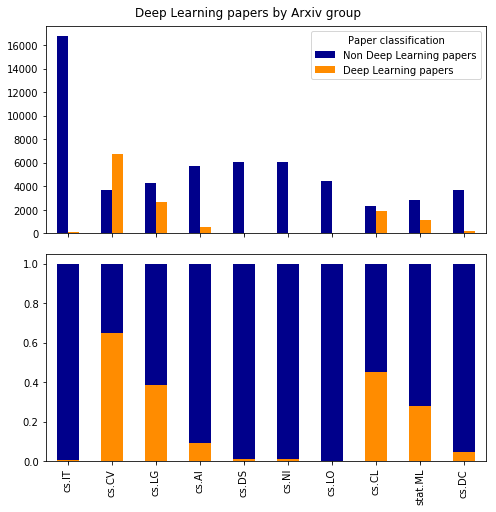

In [179]:
# Simple barplot (as above)

#Subset the data to focus on top categories
papers_subset = papers.loc[[x in top_10_cats for x in papers.category],:]

#Initialise figure
fig,ax = plt.subplots(figsize=(7,7),nrows=2,sharex=True)

#NB some rejigging of categories in the index
dl_cat = pd.crosstab(papers_subset.category,papers_subset.is_dl_cex1).loc[top_10_cats,:]
dl_cat_norm = pd.crosstab(papers_subset.category,papers_subset.is_dl_cex1,normalize=0).loc[top_10_cats,:].iloc[:,[1,0]]

#Names of categories
dl_cat.plot.bar(colors=['darkblue','darkorange'],ax=ax[0])
dl_cat_norm.plot.bar(colors=['darkorange','darkblue'],ax=ax[1],stacked=True)

#Legend
ax[1].get_legend().set_visible(False)
ax[0].legend(labels=['Non Deep Learning papers','Deep Learning papers'],title='Paper classification')

#Title
fig.suptitle('Deep Learning papers by Arxiv group',y=1.01)

plt.tight_layout()

In [219]:
#Get top DL Arxiv areas so I can sort the charts below

dl_cats_sorted = dl_cat_norm.sort_values(True,ascending=False).index

In [220]:
def plot_dl_trends(df,category,title,variable='is_dl_cex1',ax=ax):
    '''
    This function takes a dataframe, a category (for the title), a deep learning classifier (defaults to is_dl_cex1)
    and an ax and returns a plot with results.
    
    '''
    #Subset the data
    df_selected = df.loc[[x in category for x in df.category],:] 
    
    #DL/non_DL papers per year
    year_dl = pd.crosstab(df_selected.year,df_selected[variable]).iloc[:,[1,0]]

    #Normalised for stacked barchart
    year_dl_norm = pd.crosstab(df_selected.year,df_selected[variable],normalize=0).iloc[:,[1,0]]

    #Initialise fig and ax
    #fig,ax = plt.subplots(figsize=(7,7),nrows=2)

    #Plot
    year_dl.plot(ax=ax[0],color=['darkorange','darkblue'])
    year_dl_norm.plot.bar(stacked=True,ax=ax[1],color=['darkorange','darkblue'])

    #Set a couple of things off. Not sure why sharex wasn't working above.
    #ax[0].get_xaxis().set_visible(False)
    ax[1].get_legend().set_visible(False)

    #Change legend title
    ax[0].legend(labels=['Non Deep Learning papers','Deep Learning papers'],title='Paper classification')

    
    #plt.subplots_adjust(hspace=0)
    #Title
    ax[0].set_title(title+': Total papers (DL / Non DL)')
    ax[1].set_title(title+': DL Share of all papers')
    
    ax[1].hlines(y=0.5,xmin=-0.5,xmax=11,color='white')

    return(ax)
    
    
    
    
    
    
    

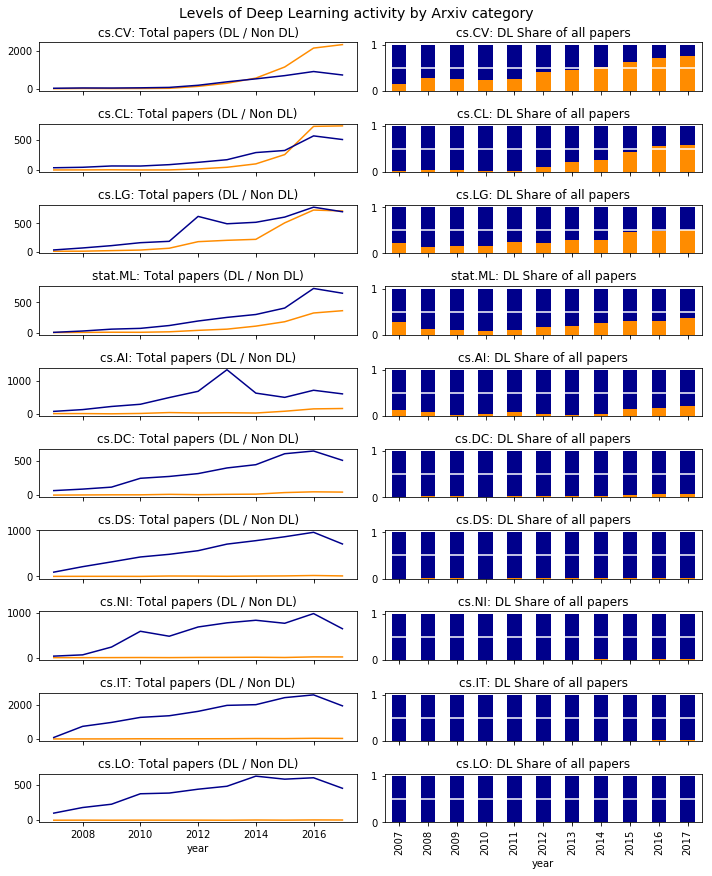

In [223]:
fig,ax = plt.subplots(nrows=10,ncols=2,figsize=(10,12),sharex='col')

for number,category in enumerate(dl_cats_sorted):


    plot_dl_trends(papers,category,title=category,ax=ax[number])
    ax[number][0].get_legend().set_visible(False)
    
fig.suptitle('Levels of Deep Learning activity by Arxiv category (Cex 1 definition)',y=1.01,fontsize=14)
plt.tight_layout()

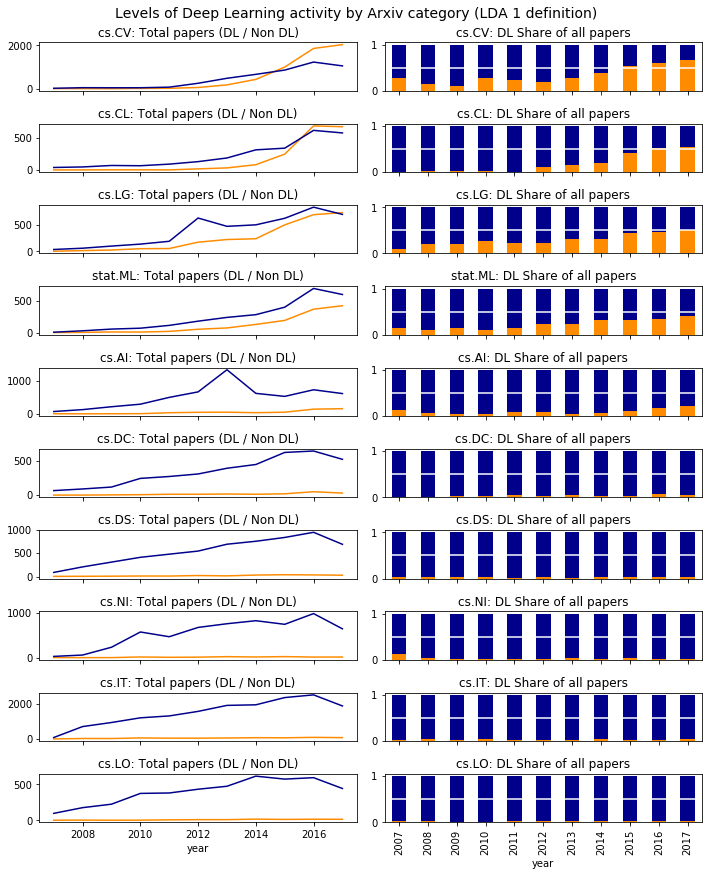

In [225]:
fig,ax = plt.subplots(nrows=10,ncols=2,figsize=(10,12),sharex='col')

for number,category in enumerate(dl_cats_sorted):


    plot_dl_trends(papers,category,title=category,ax=ax[number],variable='is_dl_lda')
    ax[number][0].get_legend().set_visible(False)
    
fig.suptitle('Levels of Deep Learning activity by Arxiv category (LDA definition)',y=1.01,fontsize=14)
plt.tight_layout()